# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
!pip install palmerpenguins
import pandas as pd
from palmerpenguins import load_penguins
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
penguins = penguins.dropna()
X = penguins.drop("bill_depth_mm", axis=1)
y = penguins[["bill_depth_mm"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

Model 1

In [24]:
ctr = ColumnTransformer(
    [
    ("standardize", StandardScaler(), ["bill_length_mm"])
    ], remainder="drop"
)

lr_pipeline = Pipeline(
    [("preprocessing", ctr),
     ("lr", LinearRegression())]
)
#lr_pipeline

In [25]:
#lr_pipeline.fit(X_train, y_train)
#y_pred = lr_pipeline.predict(X_test)
#r2_score(y_test, y_pred)


lr_fit = lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_fit.predict(X_test)
y_pred_lrT = lr_fit.predict(X_train)

msetest = mean_squared_error(y_test, y_pred_lr)
msetrain = mean_squared_error(y_train, y_pred_lrT)
R2test = r2_score(y_test, y_pred_lr)
R2train = r2_score(y_train, y_pred_lrT)

print(msetrain)
print(msetest)



3.624654525954887
3.8035378584732578
3.624654525954887
3.8035378584732578


In [26]:
MSE = []
MSE.append({
    "Flexibility": 1,
    "Training MSE": msetrain,
    "Test MSE": msetest
})


In [27]:
ctr2 = ColumnTransformer(
    [
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm",	"body_mass_g"])
    ], remainder="drop"
)

lr_pipeline2 = Pipeline(
    [("preprocessing", ctr2),
     ("lr", LinearRegression())]
)
#lr_pipeline2


In [28]:
lr_fit2 = lr_pipeline2.fit(X_train, y_train)
y_pred_lr2 = lr_fit2.predict(X_test)
y_pred_lrT2 = lr_fit2.predict(X_train)

msetest2 = mean_squared_error(y_test, y_pred_lr2)
msetrain2 = mean_squared_error(y_train, y_pred_lrT2)


print(msetrain2)
print(msetest2)


2.2755966846063345
2.8629313390725297
2.2755966846063345
2.8629313390725297


In [29]:
MSE.append({
    "Flexibility": 3,
    "Training MSE": msetrain2,
    "Test MSE": msetest2
})

In [30]:
ctr3 = ColumnTransformer(
    transformers=[
        ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm", "body_mass_g"]),
        ("dummify", OneHotEncoder(sparse_output=False), ["species", "island"])
    ],
    remainder="drop"
)

lr_pipeline3 = Pipeline(
    [("preprocessing", ctr3),
     ("lr", LinearRegression())]
)
#lr_pipeline3


In [31]:
lr_fit3 = lr_pipeline3.fit(X_train, y_train)
y_pred_lr3 = lr_fit3.predict(X_test)
y_pred_lrT3= lr_fit3.predict(X_train)

msetest3 = mean_squared_error(y_test, y_pred_lr3)
msetrain3 = mean_squared_error(y_train, y_pred_lrT3)


print(msetrain3)
print(msetest3)

0.6645583993763127
0.7994479587152312
0.6645583993763127
0.7994479587152312


In [32]:
MSE.append({
    "Flexibility": 5,
    "Training MSE": msetrain3,
    "Test MSE": msetest3
})

In [33]:
ctr4 = ColumnTransformer(
    transformers=[
        ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm", "body_mass_g"]),
        ("dummify", OneHotEncoder(sparse_output=False), ["species", "island", "sex"])
    ],
    remainder="drop"
)

lr_pipeline4 = Pipeline(
    [("preprocessing", ctr4),
     ("lr", LinearRegression())]
)
#lr_pipeline4


In [34]:
lr_fit4 = lr_pipeline4.fit(X_train, y_train)
y_pred_lr4 = lr_fit4.predict(X_test)
y_pred_lrT4= lr_fit4.predict(X_train)

msetest4 = mean_squared_error(y_test, y_pred_lr4)
msetrain4 = mean_squared_error(y_train, y_pred_lrT4)


print(msetrain4)
print(msetest4)

0.6004236283566948
0.6597653520431626
0.6004236283566948
0.6597653520431626


In [35]:
MSE.append({
    "Flexibility": 6,
    "Training MSE": msetrain4,
    "Test MSE": msetest4
})

In [36]:
MSE = pd.DataFrame(MSE)
#MSE

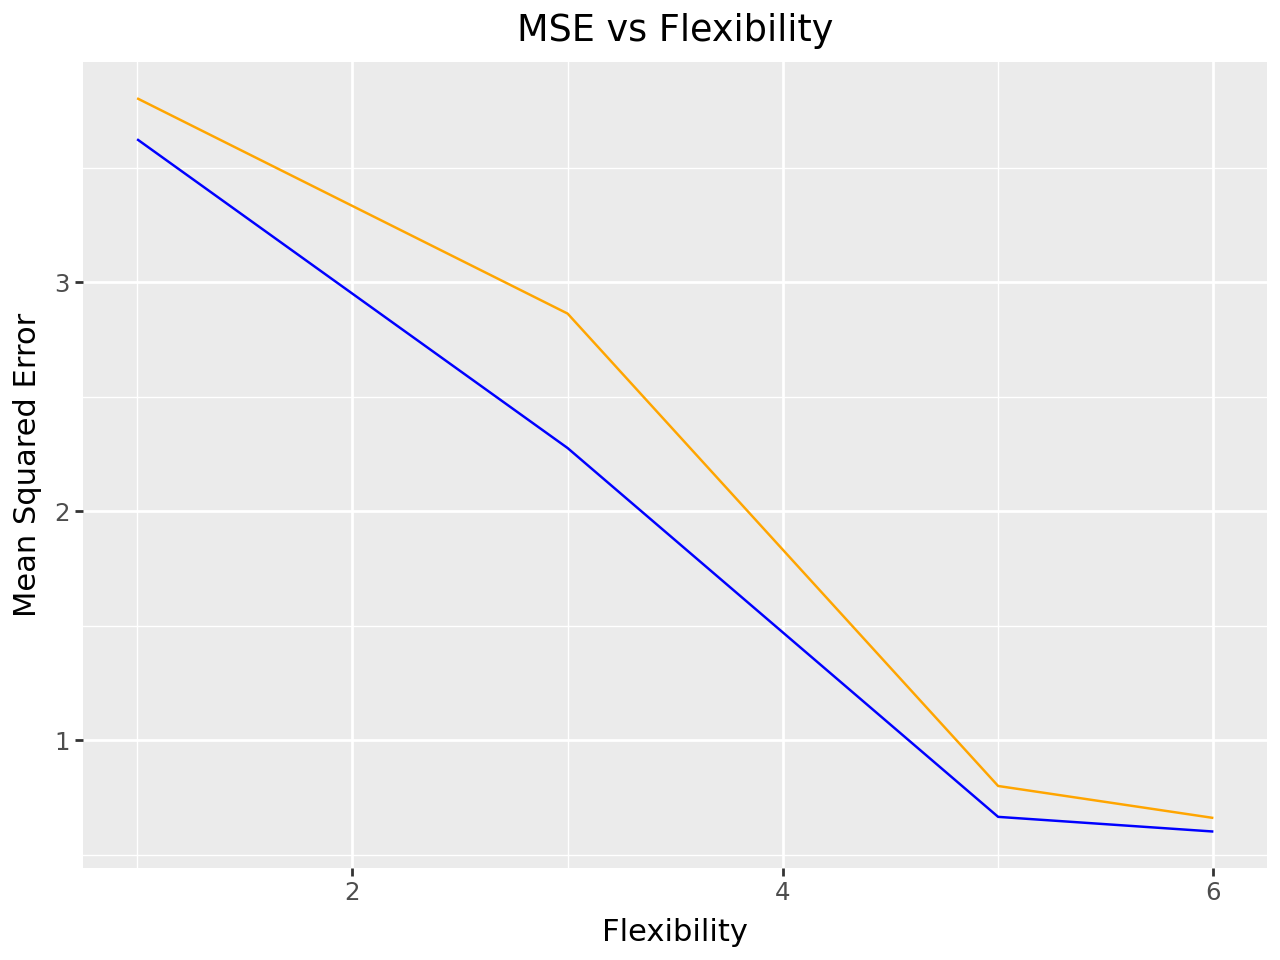

In [37]:
(ggplot(MSE, aes(x='Flexibility', y='Training MSE'))
        + geom_line(color="blue")
        + geom_line(aes(y="Test MSE"), color="orange")
        + labs(title='MSE vs Flexibility',
               x='Flexibility',
               y='Mean Squared Error',
               color='MSE Type')
        )

My last model is the besr which predicts using "bill_length_mm", "flipper_length_mm","body_mass_g" "species", "island", and "sex". This is the superior model because the RMSE for both train and test is lower compared to the others.
